In [ ]:
import numpy as np
import pandas as pd


from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import seaborn as sns

import joblib

#ARIMA


##Download Data

In [ ]:
import yfinance as yf

data = yf.download("ANTM.JK", start="2020-09-02", end="2025-09-02", auto_adjust=False)

print(data)

[*********************100%***********************]  1 of 1 completed

Price         Adj Close   Close    High     Low    Open     Volume
Ticker          ANTM.JK ANTM.JK ANTM.JK ANTM.JK ANTM.JK    ANTM.JK
Date                                                              
2020-09-02   701.267212   850.0   855.0   830.0   840.0  126138900
2020-09-03   684.766846   830.0   855.0   825.0   850.0   96483000
2020-09-04   680.641724   825.0   830.0   800.0   820.0   93463300
2020-09-07   680.641724   825.0   830.0   810.0   825.0   35138000
2020-09-08   680.641724   825.0   840.0   820.0   825.0   60255800
...                 ...     ...     ...     ...     ...        ...
2025-08-26  2880.000000  2880.0  2920.0  2880.0  2890.0   84364800
2025-08-27  2960.000000  2960.0  2990.0  2890.0  2920.0  135734500
2025-08-28  2980.000000  2980.0  3020.0  2920.0  3000.0  121877400
2025-08-29  3040.000000  3040.0  3050.0  2880.0  2960.0  222596200
2025-09-01  3200.000000  3200.0  3280.0  2950.0  2950.0  545677100

[1202 rows x 6 columns]


In [ ]:
df_ANTM = data.iloc[:, [1]]  # ambil kolom ke-1 dan ke-3
print(df_ANTM)

Price        Close
Ticker     ANTM.JK
Date              
2020-09-02   850.0
2020-09-03   830.0
2020-09-04   825.0
2020-09-07   825.0
2020-09-08   825.0
...            ...
2025-08-26  2880.0
2025-08-27  2960.0
2025-08-28  2980.0
2025-08-29  3040.0
2025-09-01  3200.0

[1202 rows x 1 columns]


In [ ]:
df_ANTM.to_csv("ANTM_JK.csv")

##Import Data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_ANTM=pd.read_csv("/content/drive/MyDrive/Dinda's Portofolio/Final Project Data Science/ANTM_JK.csv")

In [ ]:
df_ANTM

,Date,Close
0,2020-09-02,850.0
1,2020-09-03,830.0
2,2020-09-04,825.0
3,2020-09-07,825.0
4,2020-09-08,825.0
...,...,...
1197,2025-08-26,2880.0
1198,2025-08-27,2960.0
1199,2025-08-28,2980.0
1200,2025-08-29,3040.0


##Cleaning Data

In [ ]:
df_ANTM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1202 non-null   object 
 1   Close   1202 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.9+ KB


In [ ]:
df_ANTM['Date'] = pd.to_datetime(df_ANTM['Date'], errors='coerce')

In [ ]:
df_ANTM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1202 non-null   datetime64[ns]
 1   Close   1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


In [ ]:
df_ANTM.isnull().sum()

,0
Date,0
Close,0


In [ ]:
df_ANTM.duplicated().sum()

np.int64(0)

In [ ]:
df_ANTM.describe()

,Date,Close
count,1202,1202.000000
mean,2023-02-22 06:18:34.143094784,1978.955907
min,2020-09-02 00:00:00,705.000000
25%,2021-11-24 06:00:00,1600.000000
50%,2023-02-09 12:00:00,1970.000000
75%,2024-05-28 18:00:00,2330.000000
max,2025-09-01 00:00:00,3550.000000
std,NaN,521.198512


In [ ]:
df_ANTM.shape

(1202, 2)

##Exploratory Data

In [ ]:
#monthly_ANTM= df_ANTM.groupby(df_ANTM['Date'].dt.to_period('M'))['Close'].mean().reset_index()

daily_ANTM=df_ANTM.copy()

In [ ]:
#monthly_ANTM["Date"] = monthly_ANTM["Date"].dt.to_timestamp()

daily_ANTM.head()

,Date,Close
0,2020-09-02,850.0
1,2020-09-03,830.0
2,2020-09-04,825.0
3,2020-09-07,825.0
4,2020-09-08,825.0


In [ ]:
#monthly_ANTM.info()

daily_ANTM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1202 non-null   datetime64[ns]
 1   Close   1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


In [ ]:
ts1= daily_ANTM.set_index('Date')['Close']
ts1.head()

,Close
Date,
2020-09-02,850.0
2020-09-03,830.0
2020-09-04,825.0
2020-09-07,825.0
2020-09-08,825.0


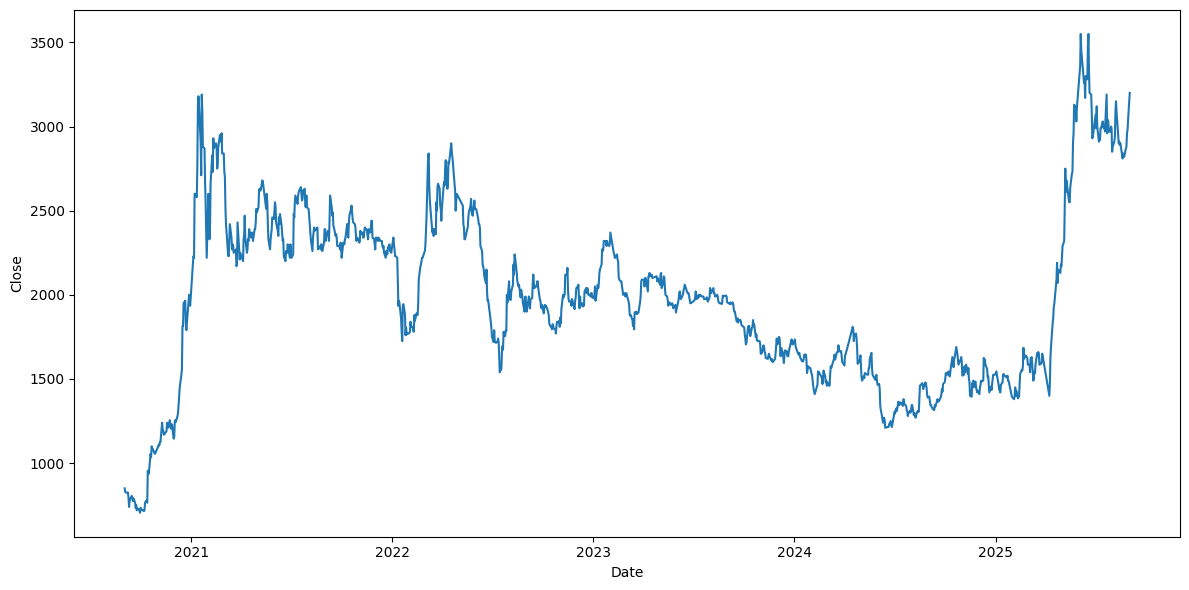

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts1.index, y=ts1.values)
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

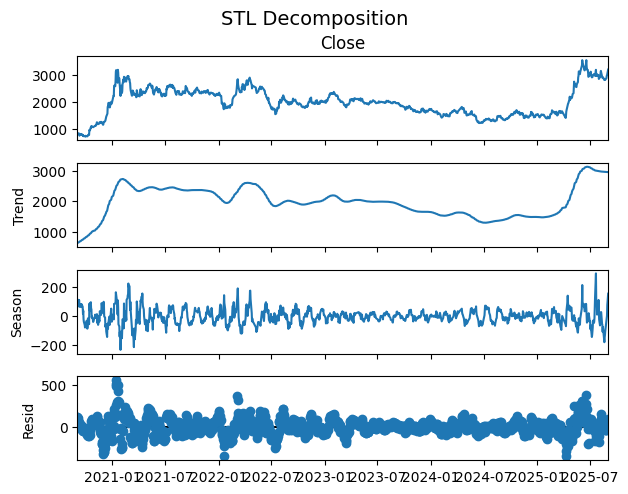

In [ ]:
from statsmodels.tsa.seasonal import STL

# Lakukan STL Decomposition
stl = STL(ts1, period=30)   # period=12 kalau data bulanan (1 tahun = 12 bulan)
result = stl.fit()

# Tampilkan komponen
fig = result.plot()
fig.suptitle("")
fig.suptitle('STL Decomposition', fontsize=14, y=1.02)
plt.show()

1. Komponen Trend

Harga menunjukkan pola naik tajam di awal 2021, kemudian menurun bertahap sepanjang 2022–2023, relatif stabil di 2024, dan kembali naik signifikan di 2025.

Tren utama menjadi penentu arah jangka menengah–panjang, jauh lebih dominan dibanding musiman.

➡️ Implikasi: tren jangka panjang adalah dasar kuat untuk strategi investasi. Saat tren naik, peluang profit lebih tinggi.

2. Komponen Seasonal

Pola musiman ada, tetapi amplitudonya kecil (±100–200) dibanding harga saham yang berada di kisaran ribuan.

Pola berulang mungkin terkait volatilitas mingguan/bulanan, tapi kontribusinya tidak signifikan dalam menentukan arah harga.

➡️ Implikasi: faktor musiman bisa membantu timing jangka sangat pendek, namun tidak krusial untuk keputusan investasi besar.

3. Komponen Residual

Residual cukup tinggi di awal (anomali/shock), kemudian semakin stabil mendekati nol.

Titik ekstrem bisa merepresentasikan gejolak pasar, berita besar, atau sentimen mendadak.

➡️ Implikasi: waspadai potensi kejadian tak terduga yang bisa menggeser harga keluar dari tren.

🎯 Rekomendasi Strategi Forecasting & Trading

Forecasting

Gunakan model berbasis tren (misalnya ARIMA dengan komponen tren, Prophet, atau LSTM dengan input STL trend).

Komponen seasonal bisa dipertahankan untuk menambah akurasi jangka pendek, tapi fokus utama tetap tren.

Residual bisa dimodelkan sebagai noise → penting untuk menilai confidence interval (rentang prediksi).

Trading/Investasi

Trend-following strategy: masuk saat tren naik (seperti awal 2021 dan 2025), keluar saat tren mulai menurun (2022–2023).

Short-term timing: manfaatkan pola musiman kecil untuk entry-exit jangka pendek, tapi jangan terlalu bergantung.

Risk management: gunakan stop-loss saat harga bergerak ekstrem melawan tren (anomali di residual).

Monitoring

Rutin update STL decomposition untuk melihat apakah tren naik 2025 akan berlanjut atau mulai jenuh.

Perhatikan lonjakan residual → bisa jadi sinyal awal perubahan tren.

#ARIMA

In [ ]:
# cek stasioneritas (ADF)

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts1)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.4032865946579327
p-value: 0.14081093955898794


Jika p-value > 0.05 → data tidak stasioner, perlu differencing (d>0 dalam ARIMA).

Jika p-value ≤ 0.05 → data stasioner, bisa langsung lanjut.

Karena P-Value > 0.05, maka perlu dilakukan differencing

In [ ]:
# transform log

ts_log = np.log(ts1)
ts_log.head()

,Close
Date,
2020-09-02,6.745236
2020-09-03,6.721426
2020-09-04,6.715383
2020-09-07,6.715383
2020-09-08,6.715383


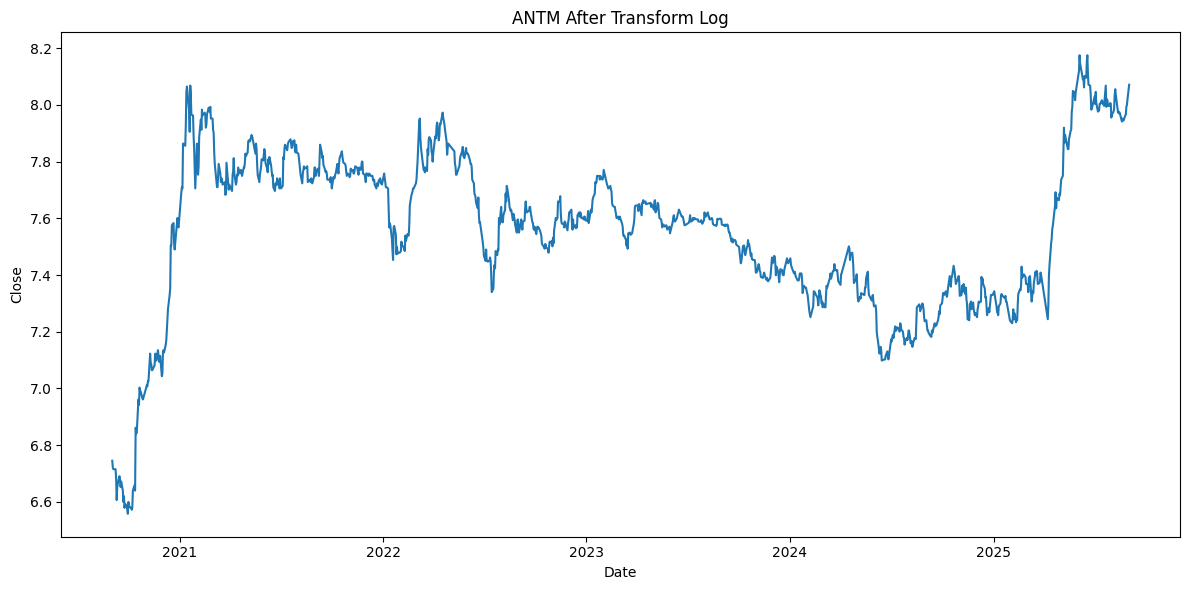

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts_log.index, y=ts_log.values)
plt.title('ANTM After Transform Log')
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

In [ ]:
# First Order Differencing
"""
monthly_ANTM["Close_diff1"] = monthly_ANTM["Close"].diff()
monthly_ANTM= monthly_ANTM.dropna().reset_index(drop=True)
monthly_ANTM.head()"""

ts_log_diff1 = ts_log.diff().dropna()
ts_log_diff1.head()

,Close
Date,
2020-09-03,-0.023811
2020-09-04,-0.006042
2020-09-07,0.000000
2020-09-08,0.000000
2020-09-09,-0.037041


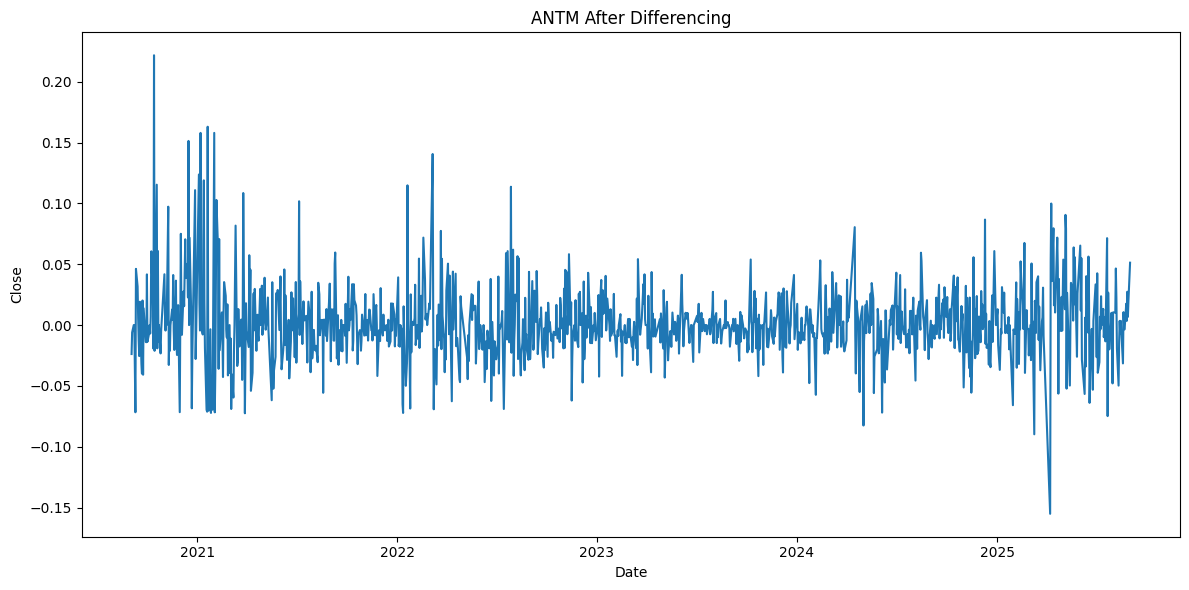

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts_log_diff1.index, y=ts_log_diff1.values)
plt.title('ANTM After Differencing')
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

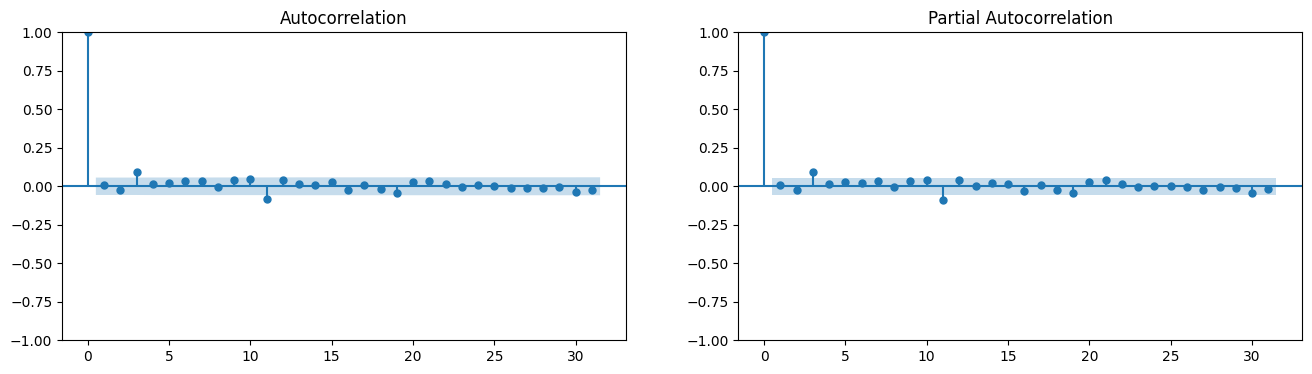

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(16,4))
plot_acf(ts_log_diff1, ax=axes[0])
plot_pacf(ts_log_diff1, ax=axes[1])
plt.show()

1. p (autoregressive order, AR) → dilihat dari PACF (Partial Autocorrelation Function)

PACF menunjukkan hubungan antar data dengan lag tertentu, setelah mengontrol efek lag sebelumnya.

Jika PACF cut-off (terputus) pada lag ke-p, artinya model AR(p) cocok.

Contoh:

PACF signifikan sampai lag 2 → kandidat AR(2).

2. q (moving average order, MA) → dilihat dari ACF (Autocorrelation Function)

ACF menunjukkan hubungan antar data dengan lag tertentu secara langsung.

Jika ACF cut-off pada lag ke-q, artinya model MA(q) cocok.

Contoh:

ACF signifikan sampai lag 1 → kandidat MA(1).

In [ ]:
result = adfuller(ts_log_diff1)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -18.349963682346207
p-value: 2.2375244911576574e-30


p-value < 0.05, maka data sudah stasioner

In [ ]:
train_size = ts1[:'2025-07-20']
test_size = ts1['2025-07-21':]

In [ ]:
train_size.head()

,Close
Date,
2020-09-02,850.0
2020-09-03,830.0
2020-09-04,825.0
2020-09-07,825.0
2020-09-08,825.0


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA(1,1,1)
AIC: -4953.45, BIC: -4938.18


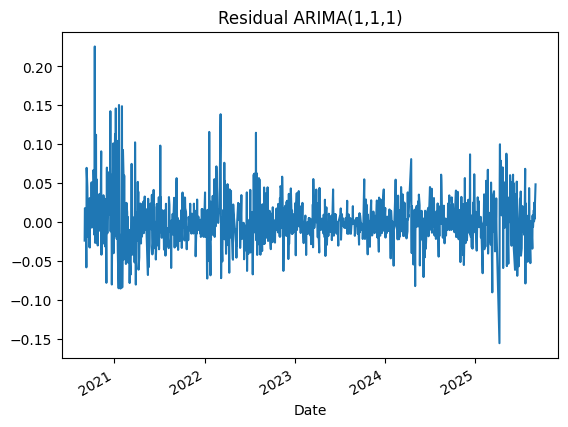


ARIMA(0,1,0)
AIC: -4145.89, BIC: -4140.80


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


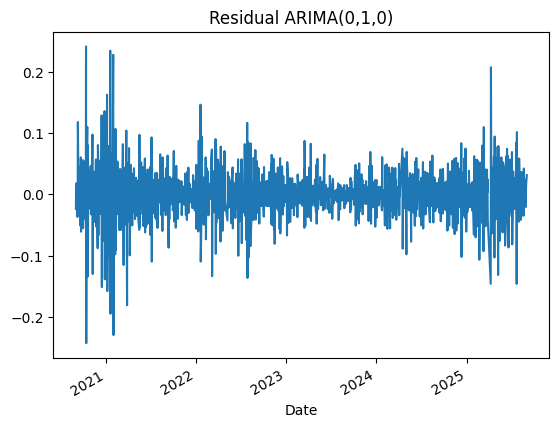

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA(1,1,0)
AIC: -4462.73, BIC: -4452.55


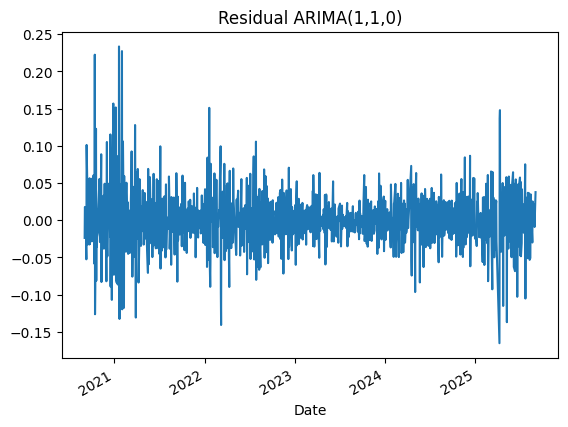

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA(0,1,1)
AIC: -4955.41, BIC: -4945.23


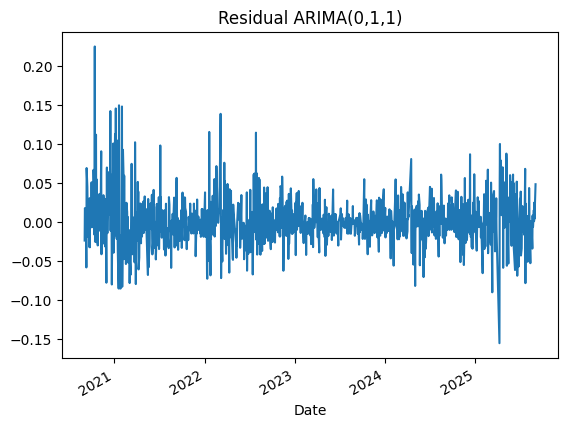

In [ ]:
# Model kandidat

import statsmodels.api as sm

models = {
    "ARIMA(1,1,1)": (1,1,1),
    "ARIMA(0,1,0)": (0,1,0),
    "ARIMA(1,1,0)": (1,1,0),
    "ARIMA(0,1,1)": (0,1,1)
}

results = {}

for name, order in models.items():
    model = sm.tsa.ARIMA(ts_log_diff1, order=order)
    fitted = model.fit()
    results[name] = {
        "AIC": fitted.aic,
        "BIC": fitted.bic,
        "Model": fitted
    }
    print(f"\n{name}")
    print(f"AIC: {fitted.aic:.2f}, BIC: {fitted.bic:.2f}")

    # Plot residual
    fitted.resid.plot(title=f"Residual {name}")
    plt.show()

###ARIMA(1,1,1)

In [ ]:
model_arima = ARIMA(np.log(train_size), order=(1,1,1))  # Buat model ARIMA dengan log-transformed data
result_arima = model_arima.fit()  # Latih model ARIMA

# Forecast dalam bentuk log selama panjang data uji (misal Maret = 31 hari)
forecast_arima_log = result_arima.forecast(steps=len(test_size))

# Kembalikan hasil forecast dari skala log ke skala asli dengan fungsi eksponensial
forecast_arima = np.exp(forecast_arima_log)  # Ini adalah hasil prediksi revenue harian

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
forecast_arima_log.head()

,predicted_mean
1172,7.996086
1173,7.996084
1174,7.996084
1175,7.996084
1176,7.996084


In [ ]:
model_ets = ExponentialSmoothing(train_size, trend='add', seasonal='add', seasonal_periods=7)  # Buat model ETS
result_ets = model_ets.fit()  # Latih modelnya

# Lakukan prediksi sebanyak panjang data uji
forecast_ets = result_ets.forecast(steps=len(test_size))  # Hasil prediksi revenue harian dari model ETS

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast_ets.head(2)

,0
1172,2974.947618
1173,2976.140731


In [ ]:
mape_arima = mean_absolute_percentage_error(test_size, forecast_arima)  # Error ARIMA
mape_ets = mean_absolute_percentage_error(test_size, forecast_ets)      # Error ETS

# Tampilkan hasil evaluasi dalam format persentase
print(f'MAPE ARIMA: {mape_arima:.2%}')  # Misalnya: 8.45%
print(f'MAPE ETS: {mape_ets:.2%}')

MAPE ARIMA: 2.82%
MAPE ETS: 3.29%


In [ ]:
# Pilih model dengan MAPE terkecil sebagai model terbaik

best_model = "ARIMA" if mape_arima < mape_ets else "ETS"  # Jika MAPE ARIMA lebih kecil, pilih ARIMA, jika tidak pilih ETS

# Tampilkan model terbaik berdasarkan evaluasi MAPE
print(f"Model terbaik berdasarkan MAPE adalah: {best_model}")

Model terbaik berdasarkan MAPE adalah: ARIMA


Karena model terbaik adalah ARIMA, maka kita menggunakan metode ARIMA untuk memprediksi 30 hari ke depan

In [ ]:
# Forecast ulang selama 15 hari menggunakan model terbaik yang sudah ditentukan
steps_ahead = 30  # Prediksi 15 hari ke depan

if best_model == "ARIMA":
    # Fit ulang ARIMA ke seluruh data latih
    tuned_arima_model = ARIMA(np.log(train_size), order=(1,1,1)).fit()

    # Prediksi 15 hari ke depan dalam skala log
    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)

    # Kembalikan hasil ke skala asli
    forecast = np.exp(forecast_log)

else:
    # Fit ulang ETS ke seluruh data latih
    tuned_ets_model = ExponentialSmoothing(train_size, trend='add', seasonal='add', seasonal_periods=7).fit()

    # Prediksi 15 hari ke depan
    forecast = tuned_ets_model.forecast(steps=steps_ahead)

# Siapkan tanggal untuk hasil prediksi
forecast.index = pd.date_range(start='2025-09-02', periods=steps_ahead, freq='D')

# Jika kamu memiliki actual test data 15 hari juga (misal Maret), evaluasi bisa dilakukan
# Kalau tidak, langkah evaluasi di bawah hanya ilustratif
# Ubah test ke test_15 jika tersedia, atau sesuaikan:
test_30 = test_size[:steps_ahead]  # Ambil 15 hari pertama dari test untuk evaluasi

# Hitung metrik evaluasi
mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))

# Tampilkan hasil evaluasi
print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

MAPE: 2.82%
MAE : 83.91
RMSE: 104.12


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast.head()

,predicted_mean
2025-09-02,2969.312450
2025-09-03,2969.306528
2025-09-04,2969.306477
2025-09-05,2969.306476
2025-09-06,2969.306476


In [ ]:
forecast_september_df = forecast.to_frame().reset_index()
forecast_september_df.columns = ['Date', 'Forecasted_Close']

# Tampilkan beberapa baris teratas sebagai preview
forecast_september_df.head()

,Date,Forecasted_Close
0,2025-09-02,2969.312450
1,2025-09-03,2969.306528
2,2025-09-04,2969.306477
3,2025-09-05,2969.306476
4,2025-09-06,2969.306476


In [ ]:
df_september_index= forecast_september_df.set_index('Date')['Forecasted_Close']
df_september_index.head(2)

,Forecasted_Close
Date,
2025-09-02,2969.312450
2025-09-03,2969.306528


In [ ]:
test_size

,Close
Date,
2025-07-21,3190.0
2025-07-22,2960.0
2025-07-23,3040.0
2025-07-24,3030.0
2025-07-25,2970.0
2025-07-28,2970.0
2025-07-29,3000.0
2025-07-30,2990.0
2025-07-31,2850.0


In [ ]:
forecast_arima

,predicted_mean
1172,2969.312450
1173,2969.306528
1174,2969.306477
1175,2969.306476
1176,2969.306476
1177,2969.306476
1178,2969.306476
1179,2969.306476
1180,2969.306476
1181,2969.306476


In [ ]:
# Forecast ulang selama 15 hari menggunakan model terbaik yang sudah ditentukan
steps_ahead = 30  # Prediksi 15 hari ke depan

tuned_arima_model = ARIMA(np.log(ts1), order=(1,1,1)).fit()

    # Prediksi 15 hari ke depan dalam skala log
forecast_log = tuned_arima_model.forecast(steps=steps_ahead)

    # Kembalikan hasil ke skala asli
forecast = np.exp(forecast_log)

# Siapkan tanggal untuk hasil prediksi
forecast.index = pd.date_range(start='2025-09-02', periods=steps_ahead, freq='D')

# Jika kamu memiliki actual test data 15 hari juga (misal Maret), evaluasi bisa dilakukan
# Kalau tidak, langkah evaluasi di bawah hanya ilustratif
# Ubah test ke test_15 jika tersedia, atau sesuaikan:
test_30 = ts1[:steps_ahead]  # Ambil 15 hari pertama dari test untuk evaluasi

# Hitung metrik evaluasi
mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))

# Tampilkan hasil evaluasi
print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

MAPE: 320.33%
MAE : 2,438.04
RMSE: 2,438.39


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast

,predicted_mean
2025-09-02,3202.024412
2025-09-03,3202.036925
2025-09-04,3202.037002
2025-09-05,3202.037002
2025-09-06,3202.037002
2025-09-07,3202.037002
2025-09-08,3202.037002
2025-09-09,3202.037002
2025-09-10,3202.037002
2025-09-11,3202.037002


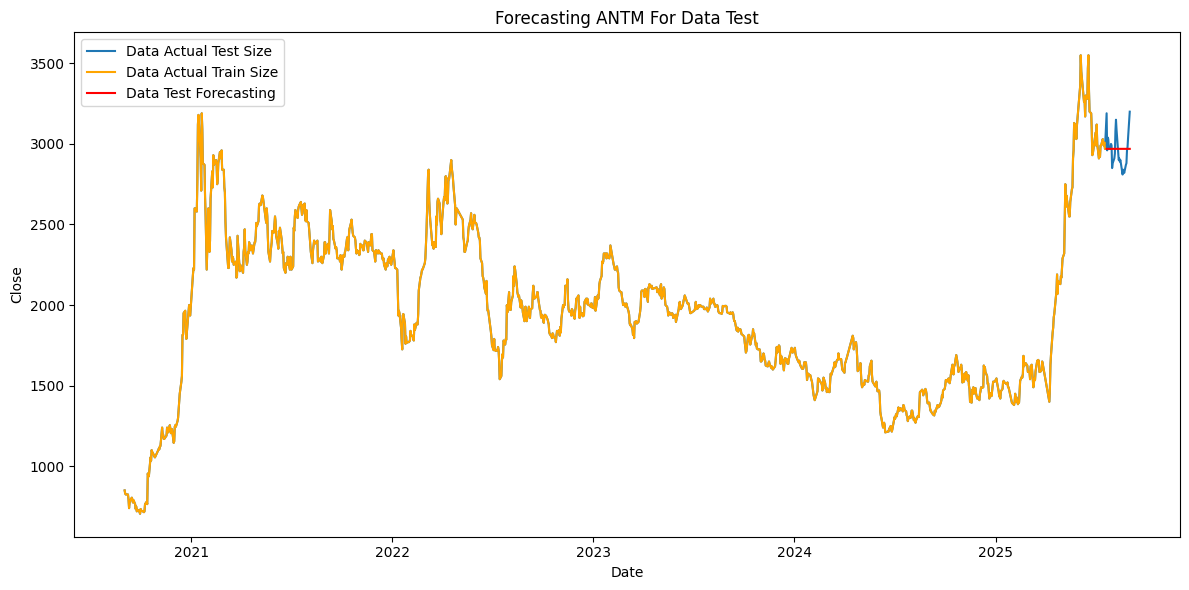

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts1.index, y=ts1.values, label='Data Actual Test Size')
sns.lineplot(x=train_size.index, y=train_size.values, label= 'Data Actual Train Size', color='orange')
sns.lineplot(x=test_size.index, y=df_september_index.values, label= 'Data Test Forecasting', color='red')


plt.title('Forecasting ANTM For Data Test')
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

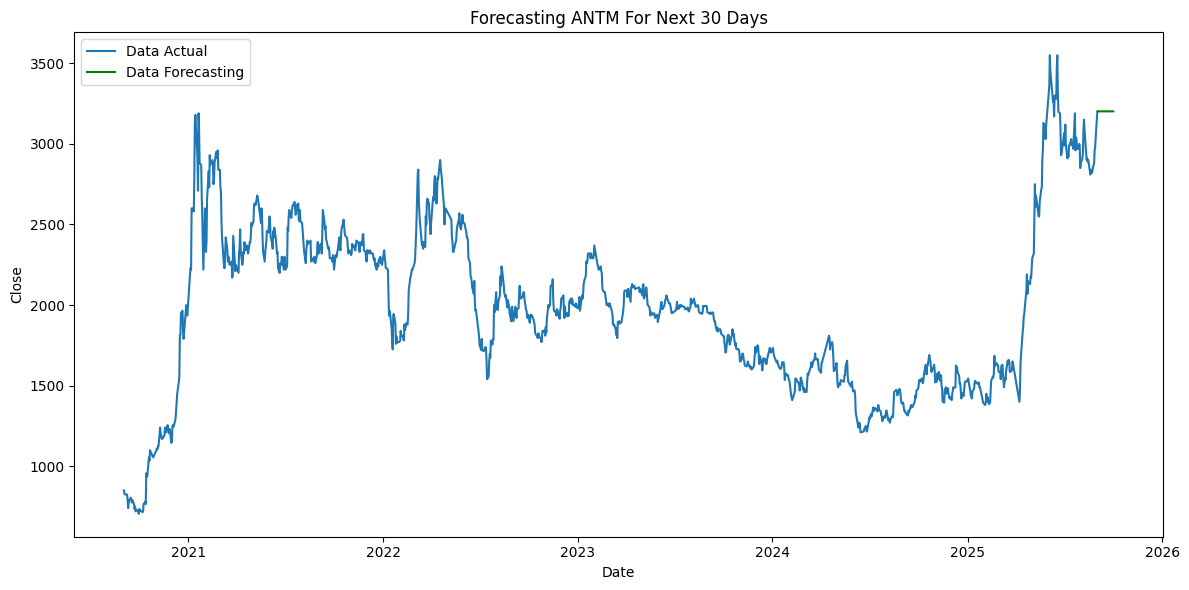

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts1.index, y=ts1.values, label='Data Actual')
sns.lineplot(x=forecast.index, y=forecast.values, label= 'Data Forecasting', color='green')

plt.title('Forecasting ANTM For Next 30 Days')
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

p = jumlah lag autoregressive (AR) → dilihat dari PACF

d = orde differencing (berapa kali dilakukan differencing untuk membuat data stasioner) → dicek pakai ADF test atau plot

q = jumlah lag moving average (MA) → dilihat dari ACF

###ARIMA(0,1,1)

In [ ]:
model_arima = ARIMA(np.log(train_size), order=(0,1,1))  # Buat model ARIMA dengan log-transformed data
result_arima = model_arima.fit()  # Latih model ARIMA

# Forecast dalam bentuk log selama panjang data uji (misal Maret = 31 hari)
forecast_arima_log = result_arima.forecast(steps=len(test_size))

# Kembalikan hasil forecast dari skala log ke skala asli dengan fungsi eksponensial
forecast_arima = np.exp(forecast_arima_log)  # Ini adalah hasil prediksi revenue harian

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
forecast_arima_log.head()

,predicted_mean
1172,7.996055
1173,7.996055
1174,7.996055
1175,7.996055
1176,7.996055


In [ ]:
model_ets = ExponentialSmoothing(train_size, trend='add', seasonal='add', seasonal_periods=7)  # Buat model ETS
result_ets = model_ets.fit()  # Latih modelnya

# Lakukan prediksi sebanyak panjang data uji
forecast_ets = result_ets.forecast(steps=len(test_size))  # Hasil prediksi revenue harian dari model ETS

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast_ets.head(2)

,0
1172,2974.947618
1173,2976.140731


In [ ]:
mape_arima = mean_absolute_percentage_error(test_size, forecast_arima)  # Error ARIMA
mape_ets = mean_absolute_percentage_error(test_size, forecast_ets)      # Error ETS

# Tampilkan hasil evaluasi dalam format persentase
print(f'MAPE ARIMA: {mape_arima:.2%}')  # Misalnya: 8.45%
print(f'MAPE ETS: {mape_ets:.2%}')

MAPE ARIMA: 2.82%
MAPE ETS: 3.29%


In [ ]:
# Pilih model dengan MAPE terkecil sebagai model terbaik

best_model = "ARIMA" if mape_arima < mape_ets else "ETS"  # Jika MAPE ARIMA lebih kecil, pilih ARIMA, jika tidak pilih ETS

# Tampilkan model terbaik berdasarkan evaluasi MAPE
print(f"Model terbaik berdasarkan MAPE adalah: {best_model}")

Model terbaik berdasarkan MAPE adalah: ARIMA


Karena model terbaik adalah ARIMA, maka kita menggunakan metode ARIMA untuk memprediksi 30 hari ke depan

In [ ]:
# Forecast ulang selama 15 hari menggunakan model terbaik yang sudah ditentukan
steps_ahead = 30  # Prediksi 15 hari ke depan

if best_model == "ARIMA":
    # Fit ulang ARIMA ke seluruh data latih
    tuned_arima_model = ARIMA(np.log(train_size), order=(0,1,1)).fit()

    # Prediksi 15 hari ke depan dalam skala log
    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)

    # Kembalikan hasil ke skala asli
    forecast = np.exp(forecast_log)

else:
    # Fit ulang ETS ke seluruh data latih
    tuned_ets_model = ExponentialSmoothing(train_size, trend='add', seasonal='add', seasonal_periods=7).fit()

    # Prediksi 15 hari ke depan
    forecast = tuned_ets_model.forecast(steps=steps_ahead)

# Siapkan tanggal untuk hasil prediksi
forecast.index = pd.date_range(start='2025-09-02', periods=steps_ahead, freq='D')

# Jika kamu memiliki actual test data 15 hari juga (misal Maret), evaluasi bisa dilakukan
# Kalau tidak, langkah evaluasi di bawah hanya ilustratif
# Ubah test ke test_15 jika tersedia, atau sesuaikan:
test_30 = test_size[:steps_ahead]  # Ambil 15 hari pertama dari test untuk evaluasi

# Hitung metrik evaluasi
mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))

# Tampilkan hasil evaluasi
print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAPE: 2.82%
MAE : 83.90
RMSE: 104.11


In [ ]:
forecast.head()

,predicted_mean
2025-09-02,2969.222693
2025-09-03,2969.222693
2025-09-04,2969.222693
2025-09-05,2969.222693
2025-09-06,2969.222693


In [ ]:
forecast_september_df = forecast.to_frame().reset_index()
forecast_september_df.columns = ['Date', 'Forecasted_Close']

# Tampilkan beberapa baris teratas sebagai preview
forecast_september_df.head()

,Date,Forecasted_Close
0,2025-09-02,2969.222693
1,2025-09-03,2969.222693
2,2025-09-04,2969.222693
3,2025-09-05,2969.222693
4,2025-09-06,2969.222693


In [ ]:
df_september_index= forecast_september_df.set_index('Date')['Forecasted_Close']
df_september_index.head(2)

,Forecasted_Close
Date,
2025-09-02,2969.222693
2025-09-03,2969.222693


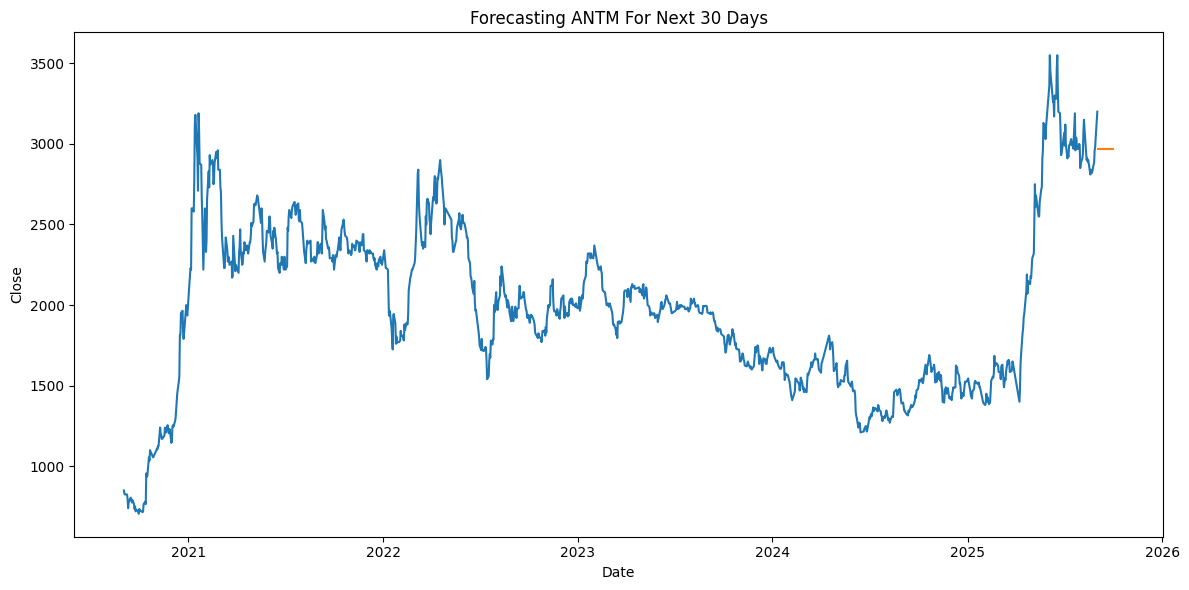

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=ts1.index, y=ts1.values, label='Data Aktual')
sns.lineplot(x=df_september_index.index, y=df_september_index.values, label='Data Forecasting')


plt.title('Forecasting ANTM For Next 30 Days')
plt.xlabel("Date")
plt.ylabel("Close")

plt.tight_layout()
plt.show()

p = jumlah lag autoregressive (AR) → dilihat dari PACF

d = orde differencing (berapa kali dilakukan differencing untuk membuat data stasioner) → dicek pakai ADF test atau plot

q = jumlah lag moving average (MA) → dilihat dari ACF

#Holt-Winters

In [ ]:
df_ANTM1= df_ANTM.copy()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df_ANTM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1202 non-null   datetime64[ns]
 1   Close   1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


In [ ]:
df_ANTM1['Date']=pd.to_datetime(df_ANTM1['Date'])

In [ ]:
df_ANTM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1202 non-null   datetime64[ns]
 1   Close   1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


In [ ]:
ts = df_ANTM1.set_index('Date')['Close']
ts.head()

,Close
Date,
2020-09-02,850.0
2020-09-03,830.0
2020-09-04,825.0
2020-09-07,825.0
2020-09-08,825.0


In [ ]:
ts.tail(30)

,Close
Date,
2025-07-21,3190.0
2025-07-22,2960.0
2025-07-23,3040.0
2025-07-24,3030.0
2025-07-25,2970.0
2025-07-28,2970.0
2025-07-29,3000.0
2025-07-30,2990.0
2025-07-31,2850.0


In [ ]:
train_size = ts[:'2025-07-20']
test_size = ts['2025-07-21':]

In [ ]:
train_size.head(2)

,Close
Date,
2020-09-02,850.0
2020-09-03,830.0


In [ ]:
test_size.head(2)

,Close
Date,
2025-07-21,3190.0
2025-07-22,2960.0


In [ ]:
print(train_size.name)

Close


In [ ]:
model = ExponentialSmoothing(
    train_size,
    trend='add',
    seasonal='add',
    seasonal_periods=30
)
fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_ets = fit.forecast(steps=len(test_size))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
mape_ets = mean_absolute_percentage_error(test_size, forecast_ets)
print(mape_ets)

0.034892027142596795


In [ ]:
forecast_ets.head(2)

,0
1172,2974.639572
1173,2948.372160


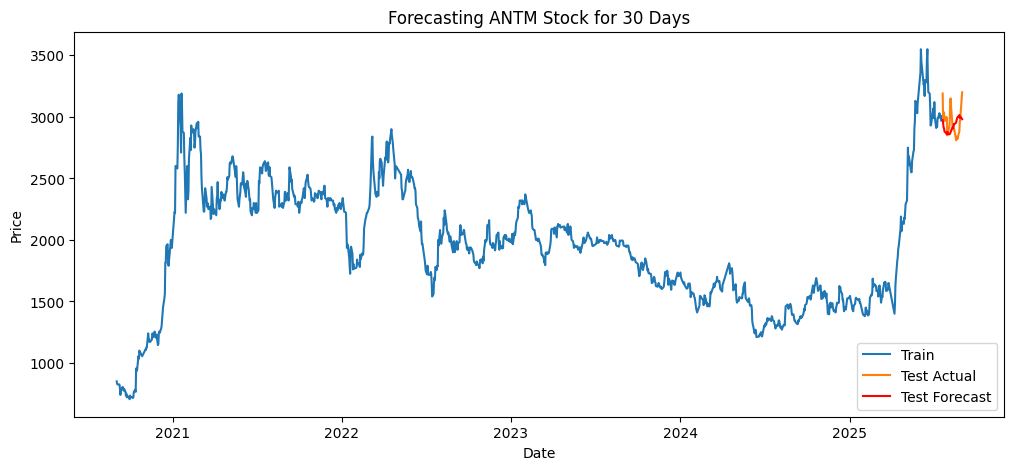

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(train_size.index, train_size, label='Train')
plt.plot(test_size.index, test_size, label='Test Actual')
plt.plot(test_size.index, forecast_ets, label='Test Forecast', color='red')

plt.title('Forecasting ANTM Stock for 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
steps_ahead = 30

tuned_ets_model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=30).fit()

# Prediksi 30 hari ke depan
forecast = tuned_ets_model.forecast(steps=steps_ahead)

# Siapkan tanggal untuk hasil prediksi
forecast.index = pd.date_range(start='2025-09-02', periods=steps_ahead, freq='D')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast

,0
2025-09-02,3212.065910
2025-09-03,3193.169291
2025-09-04,3181.009865
2025-09-05,3185.827448
2025-09-06,3170.739833
2025-09-07,3163.292901
2025-09-08,3162.430202
2025-09-09,3157.468539
2025-09-10,3171.720300
2025-09-11,3162.309467


In [ ]:
forecast_df = forecast.to_frame().reset_index()
forecast_df.columns = ['Date', 'Forecasted_Revenue']

forecast_df = forecast_df.set_index('Date')

# Tampilkan beberapa baris teratas sebagai preview
forecast_df.head()

,Forecasted_Revenue
Date,
2025-09-02,3212.065910
2025-09-03,3193.169291
2025-09-04,3181.009865
2025-09-05,3185.827448
2025-09-06,3170.739833


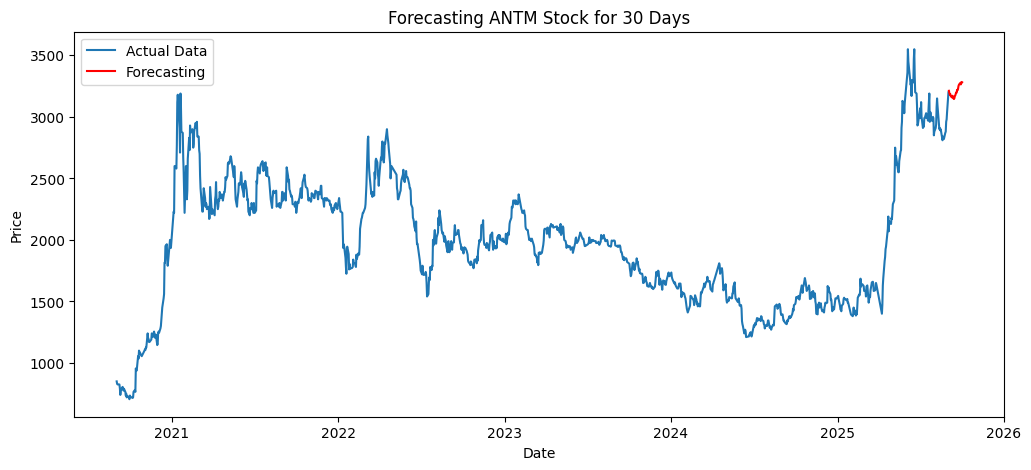

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(ts.index, ts, label='Actual Data')
plt.plot(forecast_df.index, forecast_df, label='Forecasting', color='red')

plt.title('Forecasting ANTM Stock for 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#LSTM

In [ ]:
!pip install prophet
!pip install pmdarima
!pip install statsmodels
!pip show numpy pmdarima

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
pip install numpy==1.26.4


In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
df_ANTM_lstm= df_ANTM.copy()

In [ ]:
df_ANTM_lstm

,Date,Close
0,2020-09-02,850.0
1,2020-09-03,830.0
2,2020-09-04,825.0
3,2020-09-07,825.0
4,2020-09-08,825.0
...,...,...
1197,2025-08-26,2880.0
1198,2025-08-27,2960.0
1199,2025-08-28,2980.0
1200,2025-08-29,3040.0


In [ ]:
df_ANTM_lstm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1202 non-null   datetime64[ns]
 1   Close   1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


In [ ]:
lstm_index= df_ANTM_lstm.set_index('Date')

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(lstm_index)

In [ ]:
#Plot all the variables against the Date and check for the relationships, patterns and trends
for column in lstm_index.columns[2:]:
    plt.figure(figsize=(10, 6))
    plt.plot(lstm_index, lstm_index[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} vs. Date')
    plt.tight_layout()
    plt.show()

In [ ]:
train_size =

In [ ]:
train_size = df_prophet[df_prophet['ds'] <= '2025-07-20']
test_size  = df_prophet[df_prophet['ds'] >  '2025-07-20']

In [ ]:
model = Prophet(
    daily_seasonality=False,   # karena kita pakai seasonality tahunan/mingguan
    weekly_seasonality=True,   # pola mingguan
    yearly_seasonality=True    # pola tahunan
)

In [ ]:
model.fit(train_size)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgbccmt4/mg7gxphv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgbccmt4/1q9x4zn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19187', 'data', 'file=/tmp/tmpfgbccmt4/mg7gxphv.json', 'init=/tmp/tmpfgbccmt4/1q9x4zn7.json', 'output', 'file=/tmp/tmpfgbccmt4/prophet_model0gimcaip/prophet_model-20250909022442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:24:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=len(test_size), freq='D')

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-02,747.047800,430.034837,1043.161563,747.047800,747.047800,-9.302203,-9.302203,-9.302203,-10.286773,-10.286773,-10.286773,0.984569,0.984569,0.984569,0.0,0.0,0.0,737.745597
1,2020-09-03,757.477162,399.148674,1066.739154,757.477162,757.477162,-16.998777,-16.998777,-16.998777,-14.951961,-14.951961,-14.951961,-2.046816,-2.046816,-2.046816,0.0,0.0,0.0,740.478385
2,2020-09-04,767.906523,431.534440,1059.557353,767.906523,767.906523,-28.467587,-28.467587,-28.467587,-23.198189,-23.198189,-23.198189,-5.269398,-5.269398,-5.269398,0.0,0.0,0.0,739.438936
3,2020-09-07,799.194608,444.146015,1094.012405,799.194608,799.194608,-35.119713,-35.119713,-35.119713,-19.342857,-19.342857,-19.342857,-15.776856,-15.776856,-15.776856,0.0,0.0,0.0,764.074894
4,2020-09-08,809.623969,462.810533,1076.698214,809.623969,809.623969,-36.423783,-36.423783,-36.423783,-16.959228,-16.959228,-16.959228,-19.464556,-19.464556,-19.464556,0.0,0.0,0.0,773.200186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2025-08-13,2659.309157,2337.835889,2949.709622,2655.956462,2663.000148,-4.544733,-4.544733,-4.544733,-10.286773,-10.286773,-10.286773,5.742039,5.742039,5.742039,0.0,0.0,0.0,2654.764424
1198,2025-08-14,2662.989358,2346.602827,2929.527561,2658.765387,2667.389151,-8.308956,-8.308956,-8.308956,-14.951961,-14.951961,-14.951961,6.643005,6.643005,6.643005,0.0,0.0,0.0,2654.680402
1199,2025-08-15,2666.669559,2349.074268,2940.410823,2661.814194,2671.798277,-15.489501,-15.489501,-15.489501,-23.198189,-23.198189,-23.198189,7.708688,7.708688,7.708688,0.0,0.0,0.0,2651.180057
1200,2025-08-16,2670.349760,2424.854375,3045.561855,2665.101809,2675.771548,51.252658,51.252658,51.252658,42.369486,42.369486,42.369486,8.883172,8.883172,8.883172,0.0,0.0,0.0,2721.602418


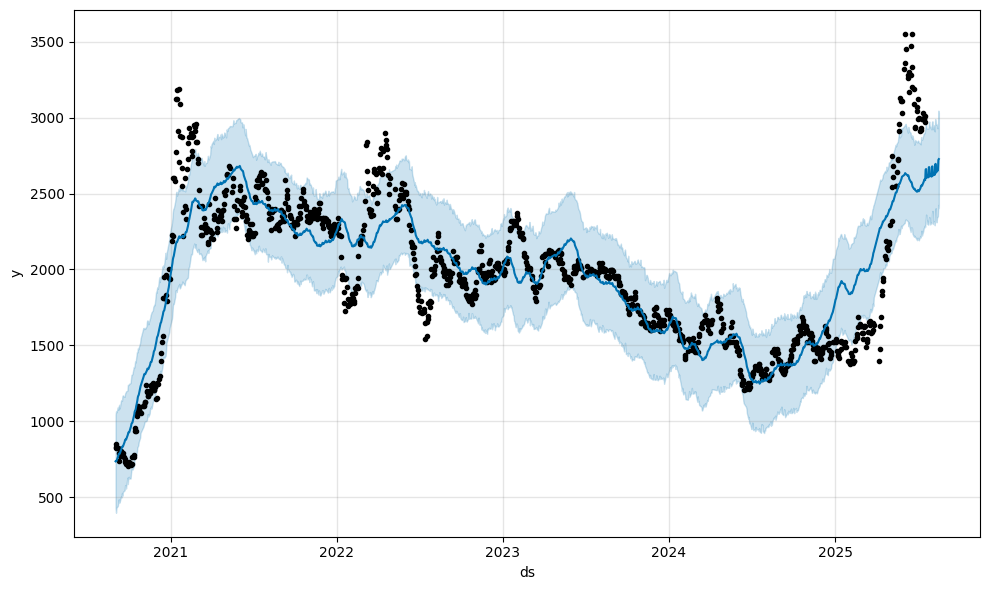

In [ ]:
fig1 = model.plot(forecast)
plt.show()

🔎 Insight Forecast

Pola Historis

Data historis (titik hitam) menunjukkan kenaikan tajam di awal 2021, kemudian penurunan bertahap sepanjang 2022–2023, relatif stabil rendah di 2024, lalu kenaikan kuat di 2025.

Prophet berhasil menangkap pola naik–turun tersebut dengan baik.

Forecast Line (garis biru)

Garis biru memperlihatkan proyeksi harga ke depan.

Tren diprediksi masih cenderung naik di 2025, dengan level rata-rata di atas periode 2022–2024.

Ini sejalan dengan hasil STL decomposition sebelumnya yang juga menunjukkan tren naik.

Confidence Interval (area biru)

Area biru adalah rentang prediksi (uncertainty).

Di awal 2021 interval cukup lebar (karena volatilitas tinggi).

Periode 2022–2023 interval mengecil (lebih stabil).

Di 2025 interval kembali melebar → ketidakpastian meningkat seiring tren naik cepat.

Artinya, walaupun arah naik cukup kuat, risiko volatilitas juga tinggi.

Kecocokan Model

Titik hitam (data aktual) banyak yang berada di dalam area biru → model Prophet cukup mampu menjelaskan pola historis.

Namun ada outlier (lonjakan tajam di atas 3000) yang tidak sepenuhnya tertangkap → menunjukkan adanya shock pasar.

🎯 Rekomendasi Strategis

Forecasting

Model Prophet cocok untuk memprediksi tren jangka menengah, terutama dengan pola naik 2025.

Namun, untuk jangka sangat pendek (harian), mungkin perlu dikombinasikan dengan model volatilitas (misalnya GARCH).

Investasi/Trading

Trend following: prospek masih naik di 2025, sehingga strategi buy on dip layak dipertimbangkan.

Risk management: gunakan stop-loss, karena interval prediksi melebar → potensi swing harga besar.

Entry timing: lebih baik masuk saat harga mendekati batas bawah interval biru (under-valued menurut forecast).

Monitoring

Update forecast secara berkala untuk memvalidasi apakah tren naik tetap terjaga atau mulai jenuh.

Waspadai pergerakan di luar interval → bisa jadi tanda perubahan tren signifikan.

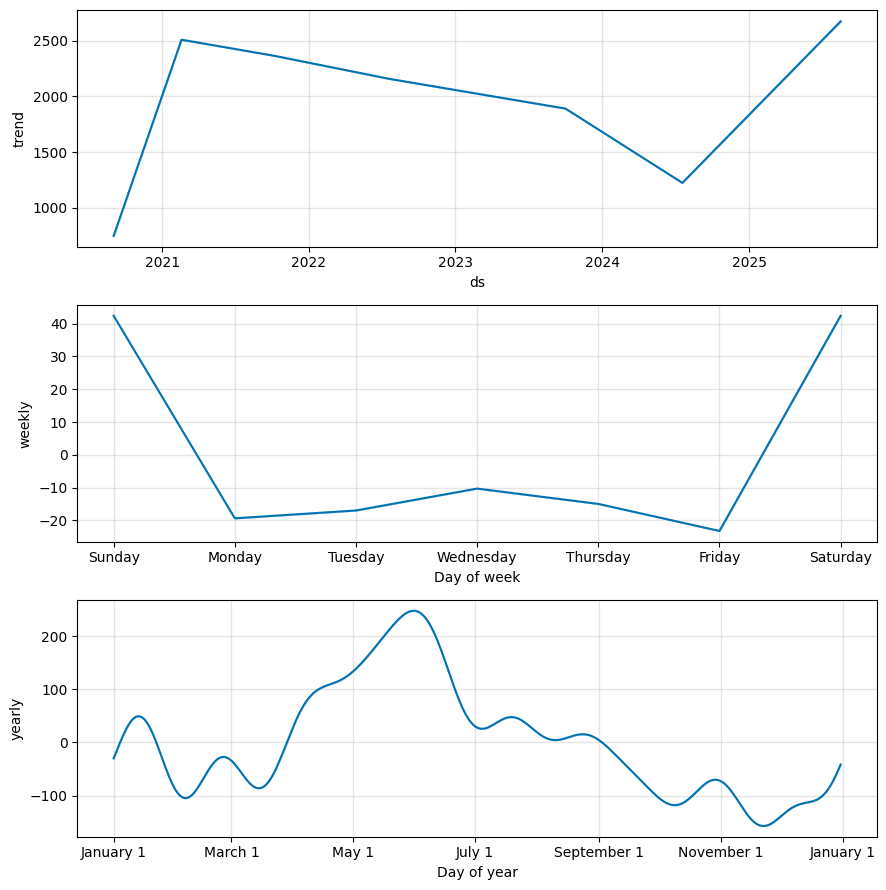

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()